In [1]:
import numpy as np
from numpy import array as arr
from matplotlib import pyplot as plt
import uncertainties as unc
from uncertainties import ufloat as uf
from uncertainties.unumpy import uarray as uarr

import matplotlib as mpl
mpl.rcParams["font.serif"] = "CMU serif"
mpl.rcParams["mathtext.fontset"] = "custom"
mpl.rcParams["mathtext.rm"] = "CMU serif"
mpl.rcParams["mathtext.it"] = "CMU serif:italic"
mpl.rcParams["mathtext.bf"] = "CMU serif:bold"
mpl.rcParams["font.family"] = "serif"

import sys
sys.path.append('./PythonHelpers/')
from PlotLib import Plotting
import PlotLib.Hist1D as Hist
import PlotLib.Plotting as Plot

heights:
top_left 63.8+/-0.4
top_right 60.3+/-0.4
bottom_left 60.72+/-0.32
bottom_right 58.7+/-0.5

mean height
 60.87+/-0.21


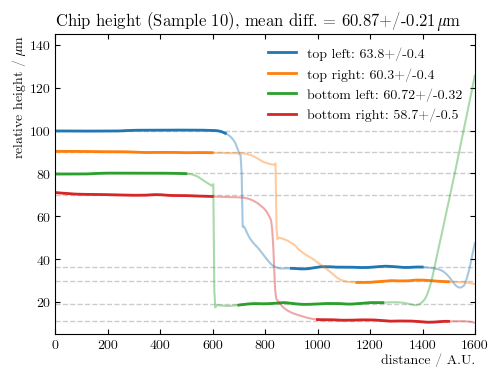

In [26]:
# DUT glue thickness
M = {
    0:"top_left",
    1:"top_right",
    2:"bottom_left",
    3:"bottom_right",
}
M2 = {
    0:"top left",
    1:"top right",
    2:"bottom left",
    3:"bottom right",
}
Range = {
    0:[[0,650],[900,1400]],
    1:[[0,600],[1150,1500]],
    2:[[0,500],[700,1250]],
    3:[[0,600],[1000,1500]],
}

diff = uarr([0,0,0,0], [0,0,0,0])

fig, ax = Plot.create_fig(1,1, figsize=(4.2,3))

print("heights:")
for i in range(4):
    filepath = "/media/jona/FORSCOPE/hi/" + M[i] + ".csv"
    dataRaw = np.genfromtxt(filepath, delimiter=',', skip_header=9)
    if i in [0,2]:
        dataRaw = np.flip(dataRaw) 
    
    lower = uf(np.mean(dataRaw[Range[i][1][0]:Range[i][1][1]]), np.std(dataRaw[Range[i][1][0]:Range[i][1][1]]))
    upper = uf(np.mean(dataRaw[Range[i][0][0]:Range[i][0][1]]), np.std(dataRaw[Range[i][0][0]:Range[i][0][1]]))
    diff[i] = upper - lower
    labelstr = M2[i] + f": {diff[i]}"
    print(M[i], diff[i])
    
    baseline = - 10*i + 100
    
    dataRaw = dataRaw - upper.nominal_value + baseline
    
    plt.axhline(baseline, color='black', linestyle='--', alpha=0.2, lw=1)
    plt.axhline(baseline-(upper.nominal_value-lower.nominal_value), color='black', linestyle='--', alpha=0.2, lw=1)
        
    plt.plot(dataRaw, alpha = 0.4, color="C"+str(i))
    plt.plot(np.arange(Range[i][1][0], Range[i][1][1]), dataRaw[Range[i][1][0]:Range[i][1][1]], color="C"+str(i), lw=2, label=labelstr )
    plt.plot(np.arange(Range[i][0][0], Range[i][0][1]), dataRaw[Range[i][0][0]:Range[i][0][1]], color="C"+str(i), lw=2)

plt.xlim(0, 1600)
plt.ylim(5, 145)
# plt.legend(loc='upper right')

Plot.finalize_noRun(fig, ax,
    f"Chip height (Sample 10), mean diff. = {np.mean(diff)}"+r"$\,\mu$m",
    "distance / A.U.", r"relative height / $\mu$m",
    title_linebreak=True, ER1=False, legend_loc='upper right')

print("\nmean height\n", np.mean(diff))
Plot.savefig(fig, "ChipHeightProfile")

In [3]:
# DUT

density_A = 2.03
density_B = 3.07

density_H20E_corr = 2 / ( 1/density_A + 1/density_B)
print(density_H20E_corr)


content_silver = 0.76
# density_H20E = 2.55 # g/cm^3
density_H20E = density_H20E_corr
density_silver = 10.50 # g/cm^3

partial_density_silver = density_H20E * content_silver
partial_density_epoxy = density_H20E - partial_density_silver
print(partial_density_silver, partial_density_epoxy)

partial_volume_silver = partial_density_silver / density_silver
partial_volume_epoxy = 1 - partial_volume_silver

print(partial_volume_silver, partial_volume_epoxy)




2.443960784313725
1.8574101960784313 0.5865505882352939
0.17689620915032678 0.8231037908496732


In [4]:
# ADENIUM plane

d_Si = 0.055 # mm
d_Kapton = 2 * 0.025 # mm

X0_Si = 93.70 # mm
X0_Kapton = 285.7 # mm

# material budget
mb_Si = d_Si / X0_Si
mb_Kapton = d_Kapton / X0_Kapton

print(mb_Si, mb_Kapton)
print(mb_Si + mb_Kapton)

0.0005869797225186766 0.0001750087504375219
0.0007619884729561984
